In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
### Generate Data :

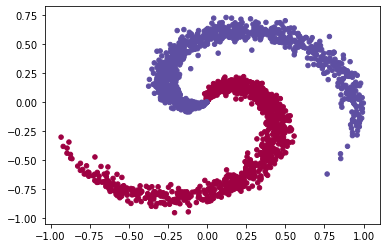

(2000, 2)
(2000, 2)


In [14]:
N = 1000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
inputs = np.zeros((N*K,D)) # data matrix (each row = single example)
targets = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    inputs[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    targets[ix] = j
    
# # lets visualize the data:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=20, cmap=plt.cm.Spectral)
plt.show()

one_hot = np.zeros((len(targets), K))
for i,_ in enumerate(targets):
    one_hot[i, targets[i]] = 1
targets = one_hot

print (inputs.shape)
print (targets.shape)

#### Shuffle Data :

In [15]:
indecis = np.arange(len(inputs))
np.random.shuffle(indecis)
inputs = inputs[indecis]
targets = targets[indecis]

 ## Model

#### Model Architecture :

In [16]:
inputs_units  = 2
hidden_units1 = 50
hidden_units2 = 50
outputs_units = 2

W1 = np.random.uniform(-1, 1, size=(inputs_units ,hidden_units1))
W2 = np.random.uniform(-1, 1, size=(hidden_units1 ,hidden_units2))
W3 = np.random.uniform(-1, 1, size=(hidden_units2 ,outputs_units))

b1 = np.random.uniform(-1, 1, size=(1, hidden_units1))
b2 = np.random.uniform(-1, 1, size=(1, hidden_units2))
b3 = np.random.uniform(-1, 1, size=(1, outputs_units))

#### Train Model :

In [17]:
learning_rate = 1e-2
epochs = 5000
observations = inputs.shape[0]
for e in range(epochs):
    linear1 =  np.dot(inputs, W1) + b1
    relu1 = np.maximum(0, linear1)
    
    linear2 =  np.dot(relu1, W2) + b2
    relu2 = np.maximum(0, linear2)
    
    linear3 =  np.dot(relu2, W3) + b3
    sigmoid = 1 / (1 + np.exp(-linear3))
    d_sigmoid = (sigmoid * (1 - sigmoid))
    
    outputs = sigmoid
    
    loss = np.sum((outputs - targets) ** 2) / 2 / observations
    if e % 100 == 0:
        print ("[Epoch: {}/{}] - Loss: {}".format(e, epochs, loss))
    
    d_loss = (outputs - targets) / observations
    
    d_sigmoid = d_loss * d_sigmoid
    d_W3 = np.dot(linear2.T, d_sigmoid)
    d_b3 = np.sum(d_sigmoid, axis=0, keepdims=True)
    d_x3 = np.dot(d_sigmoid, W3.T)
    
    d_relu2 = np.where(relu2 <= 0, d_x3, 0)
    d_W2 = np.dot(linear1.T, d_relu2)
    d_b2 = np.sum(d_relu2, axis=0, keepdims=True)
    d_x2 = np.dot(d_relu2, W2.T)
    
    d_relu1 = np.where(relu1 <= 0, d_x2, 0)
    d_W1 = np.dot(inputs.T, d_relu1)
    d_b1 = np.sum(d_relu1, axis=0, keepdims=True)

    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W3 -= learning_rate * d_W3
    b3 -= learning_rate * d_b3

[Epoch: 0/5000] - Loss: 0.4841168236544139
[Epoch: 100/5000] - Loss: 0.3552697563673921
[Epoch: 200/5000] - Loss: 0.2705769285000926
[Epoch: 300/5000] - Loss: 0.2558966297859141
[Epoch: 400/5000] - Loss: 0.24589944534100083
[Epoch: 500/5000] - Loss: 0.23699813228492067
[Epoch: 600/5000] - Loss: 0.22779285734798224
[Epoch: 700/5000] - Loss: 0.21696056313924392
[Epoch: 800/5000] - Loss: 0.2050889521840135
[Epoch: 900/5000] - Loss: 0.19284935887546056
[Epoch: 1000/5000] - Loss: 0.18178799502954188
[Epoch: 1100/5000] - Loss: 0.17571306599528946
[Epoch: 1200/5000] - Loss: 0.17276663737758124
[Epoch: 1300/5000] - Loss: 0.1721630661763508
[Epoch: 1400/5000] - Loss: 0.17326441051893268
[Epoch: 1500/5000] - Loss: 0.1744542079121331
[Epoch: 1600/5000] - Loss: 0.17529739192332572
[Epoch: 1700/5000] - Loss: 0.17636830354961625
[Epoch: 1800/5000] - Loss: 0.17794974913637523
[Epoch: 1900/5000] - Loss: 0.1802667609041548
[Epoch: 2000/5000] - Loss: 0.18295492553612552
[Epoch: 2100/5000] - Loss: 0.1859

In [9]:
predicts = np.where(outputs > .5, 1, 0)
accuracy = (predicts == targets).mean() * 100
print("Accuracy : {}%".format(accuracy))

Accuracy : 72.82499999999999%
